24h RMSE: 34.47
24h R²: -0.842


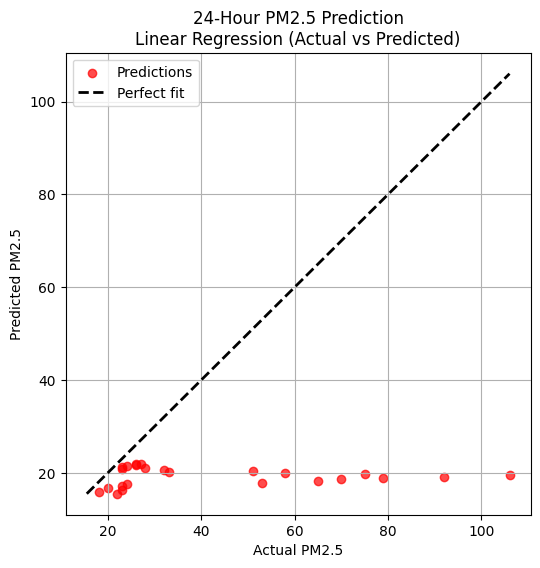

24-hour Linear Regression scatter image saved.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os

df = pd.read_csv(r"C:\Users\srust\Downloads\data.csv")
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()

features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data = df[features]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X = scaled[:-1]
y = scaled[1:, 0]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

HOURS = 24

last_input = X_test[0].copy()
pred_scaled = []

for _ in range(HOURS):
    p = model.predict(last_input.reshape(1, -1))[0]
    pred_scaled.append(p)
    last_input[0] = p

def inverse_pm25(vals):
    dummy = np.zeros((len(vals), scaled.shape[1]))
    dummy[:, 0] = vals
    return scaler.inverse_transform(dummy)[:, 0]

pred_24 = inverse_pm25(np.array(pred_scaled))
actual_24 = inverse_pm25(y_test[:HOURS])

rmse = np.sqrt(mean_squared_error(actual_24, pred_24))
r2 = r2_score(actual_24, pred_24)

print(f"24h RMSE: {rmse:.2f}")
print(f"24h R²: {r2:.3f}")

output_dir = r"C:\Users\srust\OneDrive\Desktop\LINEAR_REGRESSION_OUTPUT"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(6,6))

plt.scatter(actual_24, pred_24, color="red", alpha=0.7, label="Predictions")

min_v = min(actual_24.min(), pred_24.min())
max_v = max(actual_24.max(), pred_24.max())

plt.plot([min_v, max_v], [min_v, max_v], "k--", linewidth=2, label="Perfect fit")

plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("24-Hour PM2.5 Prediction\nLinear Regression (Actual vs Predicted)")
plt.legend()
plt.grid(True)

plt.savefig(
    rf"{output_dir}\pm25_24hr_actual_vs_predicted_lr.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

print("24-hour Linear Regression scatter image saved.")
